# International Football Data Analysis
### Importing the neccesary libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using pandas to access the results.csv dataset

In [4]:
df = pd.read_csv("C:/Users/nilab/OneDrive/Desktop/Data_for_analytics/Football_int_dataset/results.csv")

In [5]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False


## Manipulating and Transforming data

Adding three extra columns - winner, loser and draw. This will help in further analysis about the perfomance of national teams.

In [6]:
df["winner"]=df["home_score"]-df["away_score"]
df["loser"]=df["winner"]
df["draw"]=df["winner"]

In [7]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,2,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,1,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,0,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False,1,1,1
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,-2,-2,-2
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,0,0,0
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False,-3,-3,-3


Using conditional statements to fetch values in home_team and away_team to insert in winner and loser columns.

In [8]:
for x in range(0, df.shape[0]):
    if df.iloc[x, 9] > 0:
        df.iloc[x, 9] = df.iloc[x, 1]
        df.iloc[x, 10] = df.iloc[x, 2]
    elif df.iloc[x, 9] < 0:
        df.iloc[x, 9] = df.iloc[x, 2]
        df.iloc[x, 10] = df.iloc[x, 1]

In [9]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,0,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3
...,...,...,...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False,Moldova,Andorra,1
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,Latvia,Liechtenstein,-2
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,0,0,0
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False,Tunisia,Japan,-3


Placing NaN values in place of 0.

In [10]:
for x in range(0, df.shape[0]):
    if df.iloc[x, 9] == 0:
        df.iloc[x, 9] = float('NaN')
        df.iloc[x, 10] = float('NaN')

In [11]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3
...,...,...,...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False,Moldova,Andorra,1
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,Latvia,Liechtenstein,-2
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,NaN,NaN,0
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False,Tunisia,Japan,-3


Placing True and False values in draw column.

In [12]:
for x in range(0, df.shape[0]):
    if df.iloc[x, 11] > 0 or df.iloc[x, 11] < 0 :
        df.iloc[x, 11] = False
    else :
        df.iloc[x, 11] = True

In [13]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False,Moldova,Andorra,False
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,Latvia,Liechtenstein,False
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,NaN,NaN,True
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False,Tunisia,Japan,False


Making a new column to get the year of the games being played by using to_datetime method.

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,True,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,True,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False,1876


## Vizualising the data

Getting the unique years from the column and then vizualizing the number of games being played throughout the years.

In [16]:
uni_year = df['year'].unique()

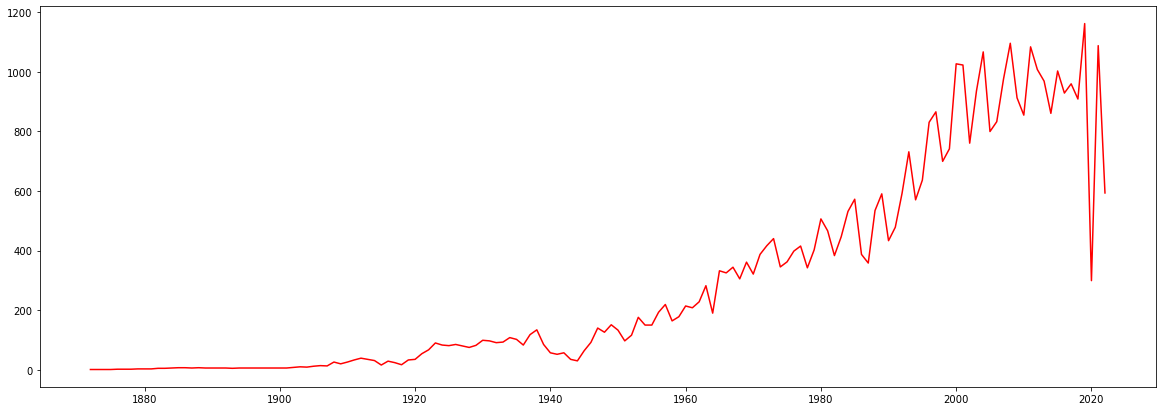

In [17]:
plt.rcParams["figure.figsize"] = (20,7)
x ,y  = np.unique(df['year'], return_counts=True) 
plt.plot(x,y, color = 'red')

Adding another column home_result for analysis of home team results.

In [18]:
df['home_result'] = 'W'

In [19]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,year,home_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,True,1872,W
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False,1873,W
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False,1874,W
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,True,1875,W
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False,1876,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False,Moldova,Andorra,False,2022,W
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,Latvia,Liechtenstein,False,2022,W
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,NaN,NaN,True,2022,W
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False,Tunisia,Japan,False,2022,W


In [20]:
df.loc[df['home_score'] < df['away_score'], 'home_result'] = 'L'
df.loc[df['home_score'] == df['away_score'], 'home_result'] = 'D'

In [21]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,draw,year,home_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,True,1872,D
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False,1873,W
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False,1874,W
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,True,1875,D
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False,1876,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False,Moldova,Andorra,False,2022,W
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,Latvia,Liechtenstein,False,2022,L
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,NaN,NaN,True,2022,D
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False,Tunisia,Japan,False,2022,L


Vizualizing the home team results.

<AxesSubplot:xlabel='home_result', ylabel='Count'>

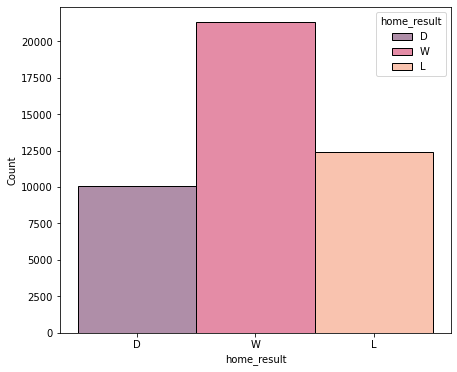

In [22]:
plt.rcParams["figure.figsize"] = (7,6)
sns.histplot(data = df, x = 'home_result', hue='home_result', palette = 'rocket')

Creating another dataframe to get top performing countries.

In [23]:
top_countries = df.winner.value_counts().head(10).rename_axis('Top Country').reset_index(name='Wins')

<AxesSubplot:xlabel='Top Country', ylabel='Wins'>

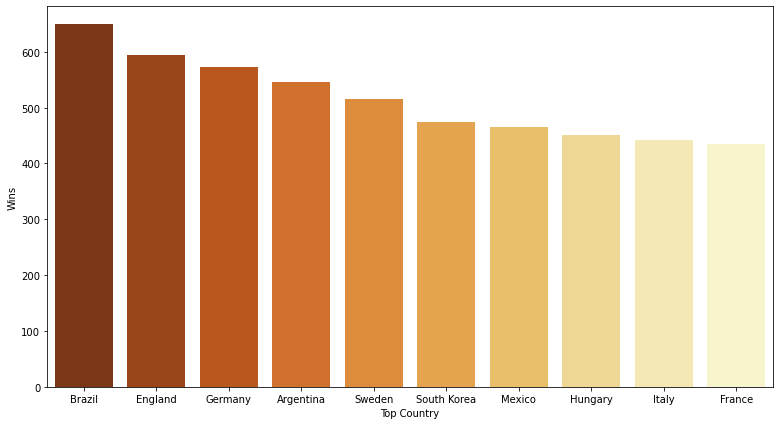

In [24]:
plt.rcParams["figure.figsize"] = (13, 7)
sns.barplot(x='Top Country', y='Wins', data = top_countries, palette='YlOrBr_r')


Creaating tournament dataframe to get the frequency of the type of matches played.

In [25]:
top_tournament = df['tournament'].value_counts().head(10).rename_axis('tournament').reset_index(name='matches_played')

<AxesSubplot:xlabel='tournament', ylabel='matches_played'>

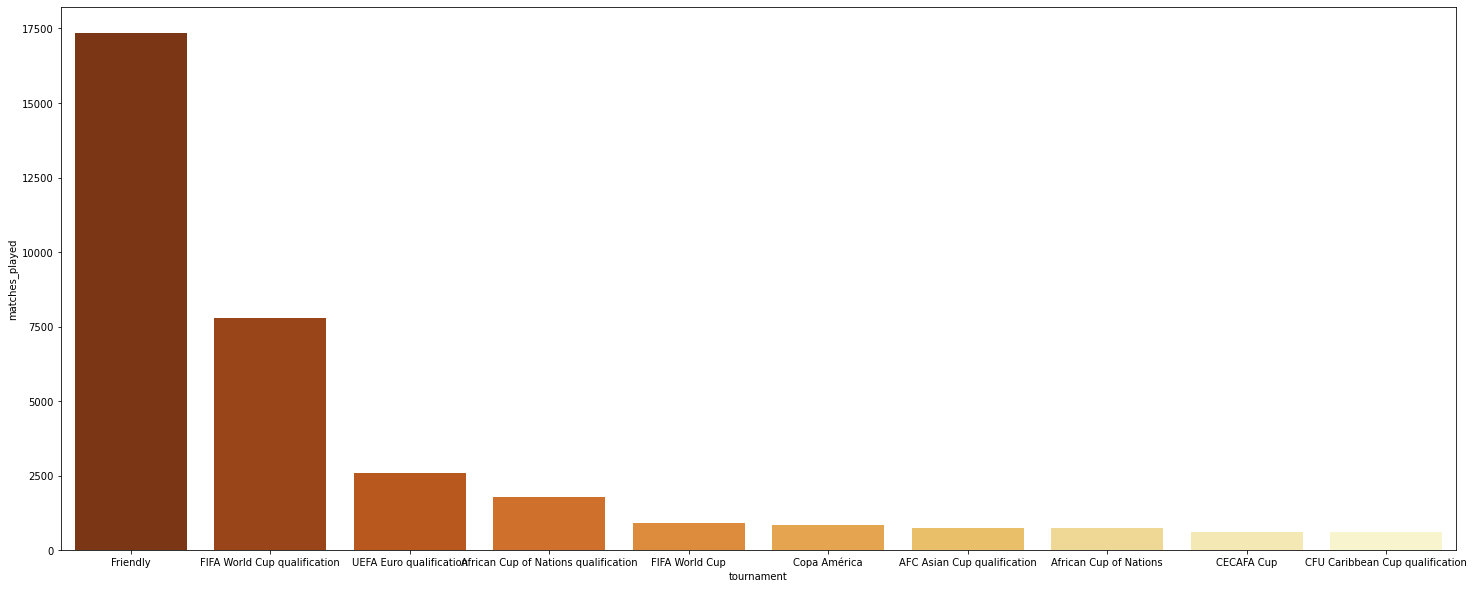

In [26]:
plt.rcParams["figure.figsize"] = (25, 10)
sns.barplot(x='tournament', y='matches_played', data = top_tournament, palette='YlOrBr_r')

Cities where most games are played.

In [27]:
df['city'].value_counts().head(10).rename_axis('city').reset_index(name='matches')

,city,matches
0,Kuala Lumpur,675
1,Doha,505
2,Bangkok,429
3,London,418
4,Budapest,407
5,Montevideo,361
6,Kuwait City,355
7,Vienna,347
8,Copenhagen,339
9,Oslo,337


Countries where most games are played.

In [30]:
df['country'].value_counts().head(10).rename_axis('country').reset_index(name='matches')

,country,matches
0,United States,1251
1,France,823
2,Malaysia,752
3,England,721
4,Sweden,658
5,Germany,605
6,Brazil,569
7,Qatar,569
8,Spain,554
9,United Arab Emirates,540
